# **Clasificación multiclase: calidad de vinos**

*El objetivo consiste en realizar una clasificación de la calidad de variantes de vino tinto a partir de un dataset con características técnicas de las variantes. El dataset incluye la columna **quality** la cual contiene valores del 3 al 8 con respecto a la calidad del vino. Esta es la columna que se va a **predecir**.*

Se utilizarán los siguientes modelos de clasificación:

1. SGD Classifier
2. LogisticRegression
3. SVC
4. Random Forest Classifier
5. XGBoost Classifier


Fuente dataset: https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009El 


### *Paloma Mareque Martínez*
---

In [ ]:
# Se requiere Python ≥ 3.5
import sys;
assert sys.version_info >= (3, 5);

# Se requiere Scikit-Learn ≥ 0.20
import sklearn;
assert sklearn.__version__ >= "0.20";

# Imports comunes
import numpy as np;
import os;

Librerías para la visualización de datos:  
- *matplotlib*
- *seaborn* (basada en *matplotlib*)

In [ ]:
%matplotlib inline

import matplotlib as mpl;
import matplotlib.pyplot as plt;

# tamaño del texto en las etiquetas por defecto
mpl.rc('axes',  labelsize=14);
mpl.rc('xtick', labelsize=12);
mpl.rc('ytick', labelsize=12);

import seaborn as sns

## Obteniendo los datos

#### Importamos la librería *pandas* para leer el fichero csv *winequality-red.csv* :

In [ ]:
# solo en Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

wines = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/SAA/winequality-red.csv");
wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Información del dataset:

Es un dataset con datos de tipo numérico(float64 excepto *quality* de tipo int64) y sin valores nulos.
La mayoría de los algoritmos de aprendizaje automático requieren datos numéricos para su entrenamiento, por ello en este dataset no es necesario realizar una limpieza de datos previa al entrenamiento.

In [ ]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
wines.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## **Exploración de datos**: visualización y correlaciones

Para entender mejor los datos se van a mostrar 4 gráficos diferentes con la librería de *matplotlib* ```plt```: un histograma de la calidad del vino, un diagrama de dispersión de alcohol vs calidad, un diagrama de cajas de azúcar residual por calidad, y un gráfico de barras de la cantidad de vinos por nivel de calidad.

El método *describe()* realiza un análisis estadístico de los datos entre todas las columnas del dataset.

In [ ]:
wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Analizando estos datos estadísticos podemos observar lo siguiente:
- La columna *quality* es la única con valores discretos en el dataset, las demás tienen valores continuos. Con valores  que van desde 3 hasta 8, la columna *quality* tiene los valores del percentil 50 y 75% en 6 y 6 respectivamente, lo que sugiere que la mayoría de los vinos en el conjunto de datos tienen una calidad relativamente alta.
- La mayoría de los vinos tienen una calidad entre 5 y 6. 
- Las columnas tienen 1599 registros.
- El contenido de alcohol varía entre 8.4 y 14.9.
- El contenido de ácido volátil es, en promedio, menor que el contenido de ácido fijo.


**Histograma de la calidad del vino:```plt.hist```**

La función de *matplotlib* para crear histogramas es ```plt.hist```, donde se muestra la frecuencia de ocurrencia de una variable en diferentes intervalos. En este histograma se utiliza un rango de calidad del vino de 3 a 8 con intervalos de bin de ancho 1, y una transparencia del 0.7 y un ancho de barra del 0.85, con el fin de evitar que las barras se superpongan y permitir una mejor visualización de la distribución.

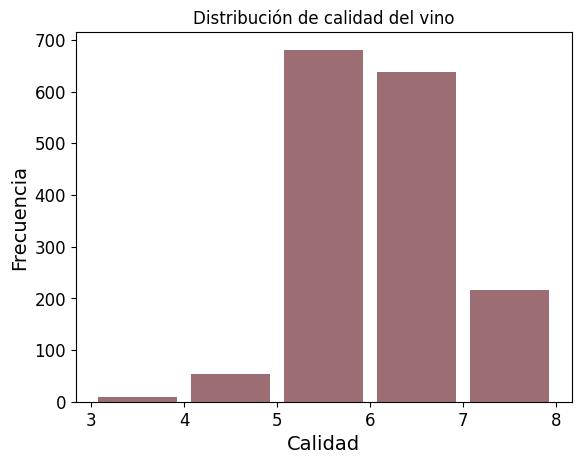

In [ ]:
plt.hist(wines['quality'], bins=range(3, 8+1), rwidth=0.85, alpha=0.7, color='#722F37')
plt.xlabel('Calidad')
plt.ylabel('Frecuencia')
plt.title('Distribución de calidad del vino')
plt.show()


El histograma muestra la frecuencia de cada nivel de calidad, lo que permite observar la cantidad de vinos en cada nivel de calidad. 

> La mayoría de los vinos tienen una calidad entre 5 y 6, con una frecuencia relativamente alta en estos niveles. También se observa que la cantidad de vinos de alta calidad(calidad 7 y 8) es mucho menor en comparación con los vinos de calidad más baja. Esto indica que la mayoría de los vinos del dataset son de calidad promedio, por lo tanto tiene menos vinos de alta calidad.

**Diagrama de dispersión alcohol vs calidad: ```plt.scatter```**

Con el diagrama podemos observar si existe alguna tendencia o patrón entre las dos variables *residual sugar* y *quality*.

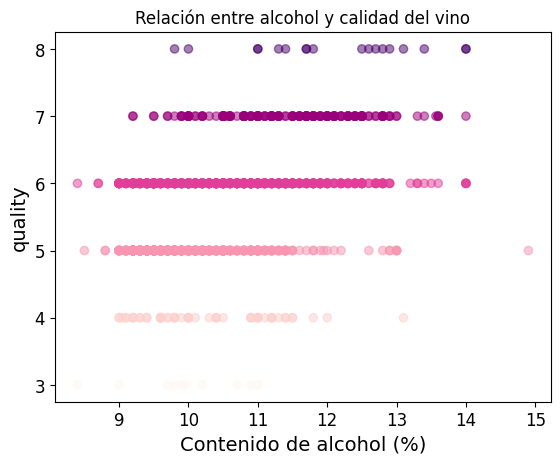

In [ ]:
plt.scatter(wines['alcohol'], wines['quality'], alpha=0.5, c=wines['quality'], cmap='RdPu')
plt.xlabel('Contenido de alcohol (%)')
plt.ylabel('quality')
plt.title('Relación entre alcohol y calidad del vino')
plt.show()


>Viendo el diagrama de dispersión podemos observar que, en general, se puede apreciar que hay una tendencia positiva. A mayor contenido de alcohol, tiende a haber vinos de mayor calidad. Sin embargo también se puede notar que hay algunas excepciones, con vinos de alta calidad pero con contenido de alcohol relativamente bajo. Por ejemplo, unas de las excepciones serían los dos puntos con 10% alcohol a los que se les da una calidad de 8. 

> Esto sugiere que aunque el contenido de alcohol puede influir en la calidad del vino, no es el único factor determinante y pueden estar involucrados otros atributos.

**Diagrama de cajas de azúcar residual por calidad: ```boxplot```**

El diagrama de cajas permite identificar la mediana, cuartiles y rango intercuartil de la columna *residual sugar* en cada nivel de calidad del vino.

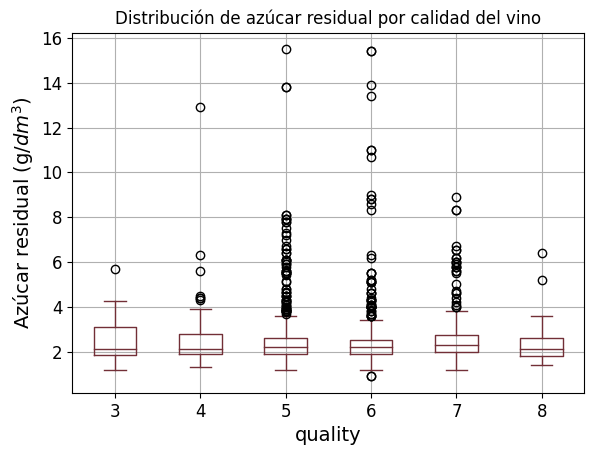

In [ ]:
wines.boxplot(column='residual sugar', by='quality', color='#722F37')
plt.xlabel('quality')
# entre $ para aplicar el formato correcto de exponente
plt.ylabel('Azúcar residual (g/$dm^3$)')
plt.title('Distribución de azúcar residual por calidad del vino')
plt.suptitle('')
plt.show()


>Viendo el diagrama de cajas podemos observar que la mediana de azúcar residual tiende a ser más alta en vinos de calidad inferior (3, 4 y 5), y va disminuyendo en vinos de mayor calidad (6, 7 y 8). Esto indica que los vinos de menor calidad pueden tener un mayor contenido de azúcar residual en comparación con vinos de mayor calidad.

> Al observar los outliers(puntos con borde negro del diagrama) en el gráfico, se puede percibir que hay algunos valores atípicos que se encuentran por encima del bigote superior en algunos niveles de calidad del vino, lo que indica que hay algunos vinos con niveles extremadamente altos de azúcar residual en ciertos niveles de calidad. 

**Gráfico de barras: cantidad de vinos por nivel de calidad**

```sns.countplot```  es una función de *Seaborn* que muestra el recuento de las observaciones en cada categoría de una variable categórica. Aquí se muestra el recuento de la columna *quality*:

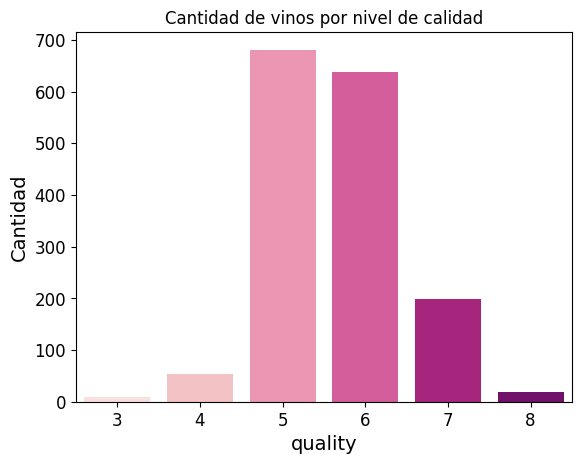

In [ ]:
sns.countplot(x=wines["quality"], palette = 'RdPu');
plt.xlabel('quality')
plt.ylabel('Cantidad')
plt.title('Cantidad de vinos por nivel de calidad')
plt.show()

> Viendo el gráfico de barras podemos observar que la gran mayoría de vinos tienen una calidad entre 5 (casi 700) y 6 (más de 600), seguido de los que tienen calidad 7 (unos 200). Los vinos con una calidad del 4, 8 y 3 son menos de 100.

**Correlaciones entre columnas:**

Con esta tabla de correlaciones se puede analizar lo siguiente:
- la columna Survived tiene una correlación positiva moderada con las columnas SibSp y Parch, lo que indica que las personas que viajaban con familiares tenían una mayor probabilidad de sobrevivir. 
- la columna Pclass tiene la correlación más baja con la columna Fare, lo que sugiere que los pasajeros de primera clase pagaron más por sus billetes que los de tercera clase.
- la columna Age tiene una correlación negativa moderada con la columna Pclass, lo que indica que los pasajeros más jóvenes tendían a viajar en clases más bajas.

Aquí ``` sort_values``` permite ver las correlaciones de la columna objetivo *quality* con el resto de columnas del dataset de forma ordenada de mayor a menor, como se establece en el parámetro ``` ascending=False```

In [ ]:
corr_matrix = wines.corr()
corr_matrix['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

Ahora se van a crear nuevas columnas que puedan proporcionar mejores correlaciones con la columna *quality*.

In [ ]:
wines["alcohol_per_volatile acidity"] = wines["alcohol"]/wines["volatile acidity"]
wines["alcohol_per_pH"] = wines["alcohol"]/wines["pH"]
wines["pH_per_volatile acidity"] = wines["pH"]/wines["volatile acidity"]

corr_matrix = wines.corr()
corr_matrix['quality'].sort_values(ascending=False)

quality                         1.000000
alcohol_per_pH                  0.496469
alcohol                         0.476166
alcohol_per_volatile acidity    0.440859
pH_per_volatile acidity         0.360292
sulphates                       0.251397
citric acid                     0.226373
fixed acidity                   0.124052
residual sugar                  0.013732
free sulfur dioxide            -0.050656
pH                             -0.057731
chlorides                      -0.128907
density                        -0.174919
total sulfur dioxide           -0.185100
volatile acidity               -0.390558
Name: quality, dtype: float64

## **ENTRENAMIENTO del clasificador multiclase**

Con la función *seed* plantamos una "semilla" para hacer que el proceso siguiente sea repetible. Una semilla es un número aleatorio utilizado para inicializar un generador de números pseudoaleatorios. Esta función se encuentra en la librería *random* de *numpy* (np).

In [ ]:
np.random.seed(42)

Con el método ```split_train_test``` separamos el 80% de los datos para el conjunto de entrenamiento y el 20% para el conjunto de testeo(test set).



In [ ]:
def split_train_test(data, test_ratio):
    # data = todo el dataframe
    # se calcula el tamaño del conjunto de testeo multiplicando el total por el ratio
    test_set_size = int(len(wines)*test_ratio)
    # permutation baraja los indices del dataframe y devuelve una lista de los elementos permutados
    shuffle_indices = np.random.permutation(len(data))
    test_indices = shuffle_indices[:test_set_size]
    train_indices = shuffle_indices[test_set_size:]

    return data.iloc[train_indices], data.iloc[test_indices]

Aplicamos el método para separar los datos.

Resultado: 
- 80% entrenamiento = 1280, 
- 20% test = 319.

In [ ]:
X_train, X_test= split_train_test(wines, 0.20)

print(f"Tamaño del conjunto de entrenamiento: {len(X_train)}")
print(f"Tamaño del conjunto de test:          {len(X_test)}")

Tamaño del conjunto de entrenamiento: 1280
Tamaño del conjunto de test:          319


En las 'y' guardamos la columna objetivo *quality* para no perder los datos a predecir y en el conjunto de las X de entrenamiento la eliminamos del dataset.

In [ ]:
y_train = X_train['quality'].copy()

X_train = X_train.drop('quality', axis=1)

#### Modelo SGDClassifier

In [ ]:
from sklearn.linear_model import SGDClassifier;

sgd_clf = SGDClassifier(max_iter=1000, random_state=42)
sgd_clf.fit(X_train, y_train)


SGDClassifier(random_state=42)

Se realiza la predicción por validación cruzada con 3 particiones (de ahí que cv=3) y después se muestra la matriz de confusión:

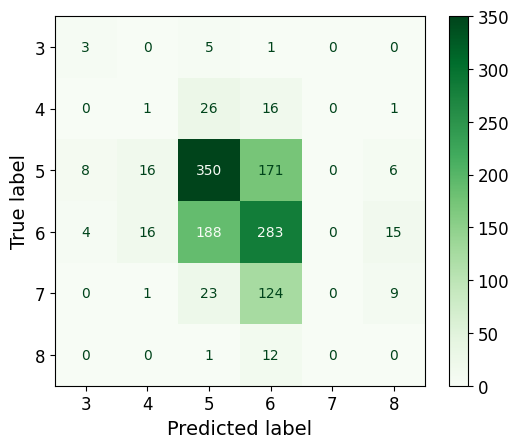

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


y_sgd_pred = cross_val_predict(sgd_clf,X_train, y_train, cv=3)

matrix = confusion_matrix(y_train, y_sgd_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=sgd_clf.classes_)
disp.plot(cmap = "Greens");

SCORES XGBoost:

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Puntuaciones:

Precisión: 	 [0.2  0.03 0.59 0.47 0.   0.  ] 0.2143097227667317
Recall: 	 [0.33 0.02 0.64 0.56 0.   0.  ] 0.25842630917396164
F1: 		 [0.25 0.03 0.61 0.51 0.   0.  ] 0.23267743786611714


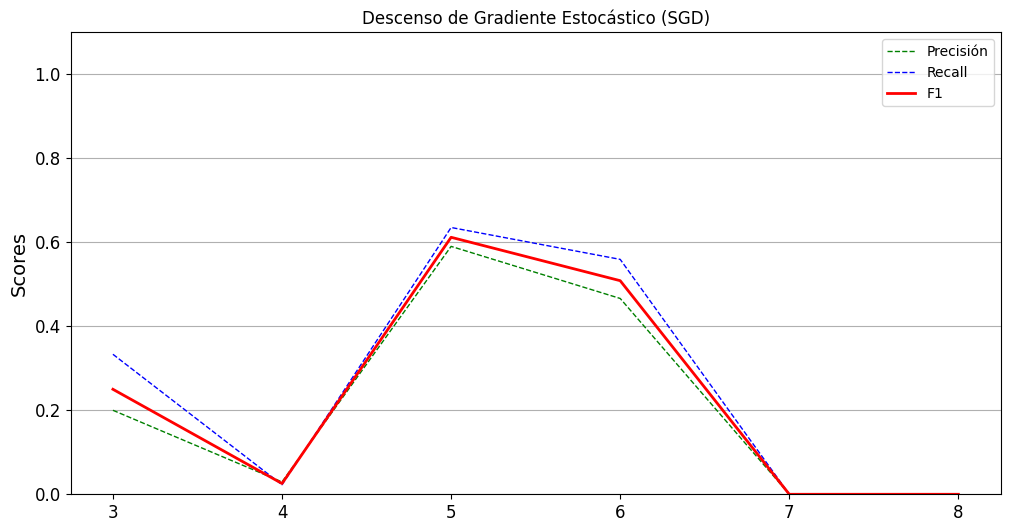

In [ ]:
from sklearn.metrics import precision_score;
from sklearn.metrics import recall_score;
from sklearn.metrics import f1_score;

precision = precision_score(y_train, y_sgd_pred, average=None)
recall = recall_score(y_train, y_sgd_pred, average=None)
f1 = f1_score(y_train, y_sgd_pred, average=None)

print('Puntuaciones:\n')
print("Precisión:","\t", np.round(precision,2), np.mean(precision));
print("Recall:","\t",    np.round(recall,   2), np.mean(recall));
print("F1:","\t\t",      np.round(f1,       2), np.mean(f1));

plt.figure(figsize=(12, 6))
ax = sns.lineplot(x=sgd_clf.classes_, y=precision, linewidth=1.0, color="green", linestyle="--", label='Precisión');
ax = sns.lineplot(x=sgd_clf.classes_, y=recall, linewidth=1.0, color="blue",  linestyle="--", label='Recall');
ax = sns.lineplot(x=sgd_clf.classes_, y=f1, linewidth=2.0, color="red", label='F1');
plt.title("Descenso de Gradiente Estocástico (SGD)");
plt.ylabel('Scores')
plt.grid(axis='y')
plt.legend()
ax.set_ylim(0,1.1);
plt.show();

Aplicando un redondeo a los scores, con el modelo logistic regressor la precisión es de un 21%, el recall tiene solo un 26% y el F1 un 23%. Pasamos a probar otro modelo para poder hacer una primera comparación.

#### Modelo LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression;
# se incrementó el max de iteraciones para evitar un warning
# /usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: 
#ConvergenceWarning: lbfgs failed to converge (status=1):
#STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.
lg_clf = LogisticRegression(max_iter=8000, random_state=42)
lg_clf.fit(X_train, y_train)


LogisticRegression(max_iter=8000, random_state=42)

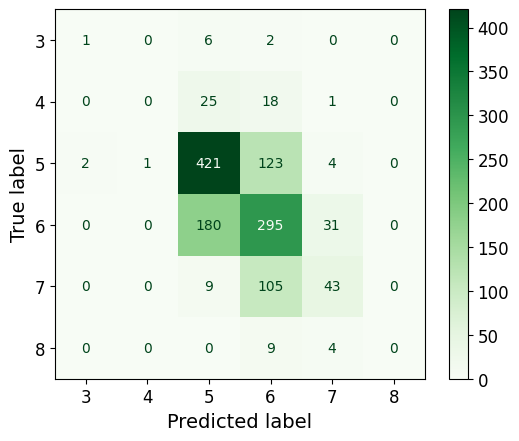

In [ ]:
# Hago la predicción por validación cruzada con 3 particiones cv=3
y_lg_pred = cross_val_predict(lg_clf,X_train, y_train, cv=3)

# Muestro la MATRIZ DE CONFUSIÓN
matrix = confusion_matrix(y_train, y_lg_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=lg_clf.classes_)
disp.plot(cmap = "Greens");

SCORES LogisticRegression:

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Puntuaciones:

Precisión: 	 [0.33 0.   0.66 0.53 0.52 0.  ] 0.3404353639659818
Recall: 	 [0.11 0.   0.76 0.58 0.27 0.  ] 0.28867762495865473
F1: 		 [0.17 0.   0.71 0.56 0.36 0.  ] 0.29817196559292575


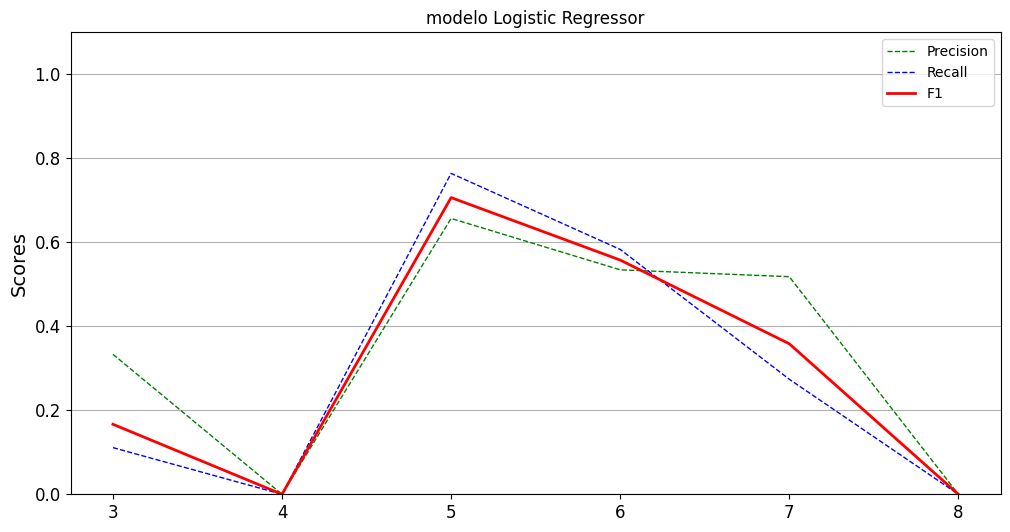

In [ ]:
from sklearn.metrics import precision_score;
from sklearn.metrics import recall_score;
from sklearn.metrics import f1_score;

precision = precision_score(y_train, y_lg_pred, average=None)
recall = recall_score(y_train, y_lg_pred, average=None)
f1 = f1_score(y_train, y_lg_pred, average=None)

print('Puntuaciones:\n')
print("Precisión:","\t", np.round(precision,2), np.mean(precision));
print("Recall:","\t",    np.round(recall,   2), np.mean(recall));
print("F1:","\t\t",      np.round(f1,       2), np.mean(f1));

plt.figure(figsize=(12, 6))
ax = sns.lineplot(x=lg_clf.classes_, y=precision, linewidth=1.0, color="green", linestyle="--", label='Precision');
ax = sns.lineplot(x=lg_clf.classes_, y=recall, linewidth=1.0, color="blue",  linestyle="--", label='Recall');
ax = sns.lineplot(x=lg_clf.classes_, y=f1, linewidth=2.0, color="red", label='F1');
plt.title("modelo Logistic Regressor");
plt.ylabel('Scores')
plt.grid(axis = 'y')
plt.legend()
ax.set_ylim(0,1.1);
plt.show();

Aplicando un redondeo a los scores, con el modelo logistic regressor la precisión es de un 34%, el recall tiene un 28% y el F1 casi un 30%. Los resultados son mejores que en el modelo SGD pues la precisión ha subido de un 21% a un 34% y las otras dos métricas también son mayores. Seguimos probando otros modelos.

#### Modelo SVC (Support Vector Classifier)

In [ ]:
from sklearn.svm import SVC

svm_clf = SVC(gamma='auto', random_state=42)
svm_clf.fit(X_train, y_train)

SVC(gamma='auto', random_state=42)

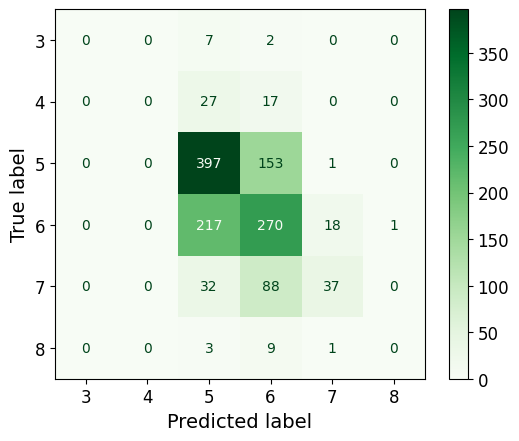

In [ ]:
# Hago la predicción cruzada
y_svm_pred = cross_val_predict(svm_clf,X_train, y_train, cv=5)

# Muestro la MATRIZ DE CONFUSIÓN
matrix = confusion_matrix(y_train, y_svm_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=svm_clf.classes_)
disp.plot(cmap="Greens");

SCORES SVC:

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Puntuaciones del modelo SVC:

Precisión: 	 [0.   0.   0.58 0.5  0.65 0.  ] 0.28855160026793353
Recall: 	 [0.   0.   0.72 0.53 0.24 0.  ] 0.24829563245378805
F1: 		 [0.   0.   0.64 0.52 0.35 0.  ] 0.25099613075961197




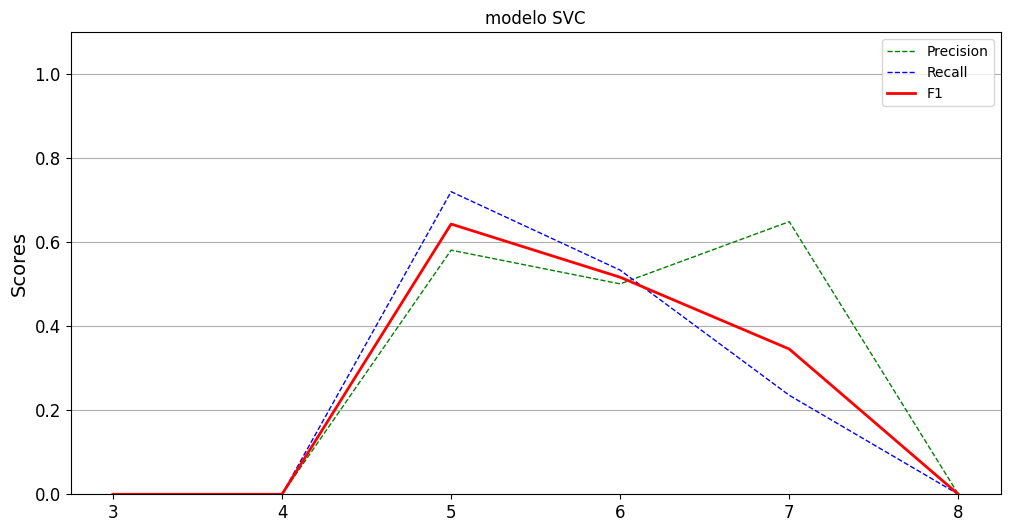

In [ ]:
from sklearn.metrics import precision_score;
from sklearn.metrics import recall_score;
from sklearn.metrics import f1_score;

precision = precision_score(y_train, y_svm_pred, average=None)
recall = recall_score(y_train, y_svm_pred, average=None)
f1 = f1_score(y_train, y_svm_pred, average=None)

print('Puntuaciones del modelo SVC:\n')
print("Precisión:","\t", np.round(precision,2), np.mean(precision));
print("Recall:","\t", np.round(recall, 2), np.mean(recall));
print("F1:","\t\t", np.round(f1, 2), np.mean(f1));
print('\n')

plt.figure(figsize=(12, 6))
ax = sns.lineplot(x=svm_clf.classes_, y=precision, linewidth=1.0, color="green", linestyle="--", label='Precision');
ax = sns.lineplot(x=svm_clf.classes_, y=recall, linewidth=1.0, color="blue",  linestyle="--", label='Recall');
ax = sns.lineplot(x=svm_clf.classes_, y=f1, linewidth=2.0, color="red", label='F1');
plt.title("modelo SVC");
plt.ylabel('Scores')
plt.grid(axis='y')
plt.legend()
ax.set_ylim(0,1.1);
plt.show();

Aplicando un redondeo a los scores, con el modelo SVC la precisión es de un 28%, el recall 24% que se acerca al 25% y el F1 un 25%. Con respecto al modelo logistic regressor, todos los valores son peores(más bajos) que los obtenidos con Logistic Regressor (precisión=34%, recall=28% y F1 casi un 30%), por lo que supera a SVC. Seguimos probando con otros modelos.

#### Modelo RandomForest Classifier:

In [ ]:
from sklearn.ensemble import RandomForestClassifier;

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

MATRIZ DE CONFUSIÓN:

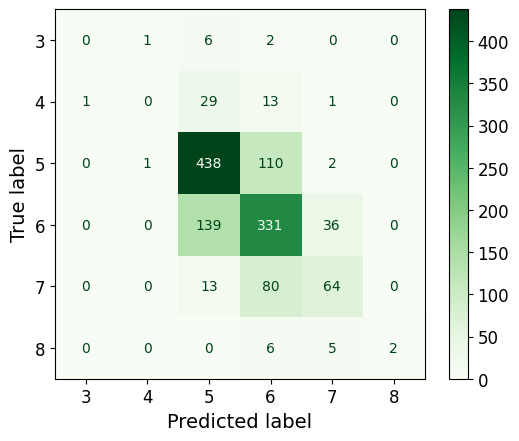

In [ ]:
# Hago la predicción cruzada con 3 particiones cv=3
y_forest_pred = cross_val_predict(forest_clf, X_train, y_train, cv=3)

# Muestro la MATRIZ DE CONFUSIÓN
matrix = confusion_matrix(y_train, y_forest_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=forest_clf.classes_)
disp.plot(cmap="Greens");

SCORES RandomForestClassifier:

Puntuaciones:

Precisión: 	 [0.   0.   0.7  0.61 0.59 1.  ] 0.48401561660061043
Recall: 	 [0.   0.   0.79 0.65 0.41 0.15] 0.33509299898084216
F1: 		 [0.   0.   0.74 0.63 0.48 0.27] 0.3543771471813076




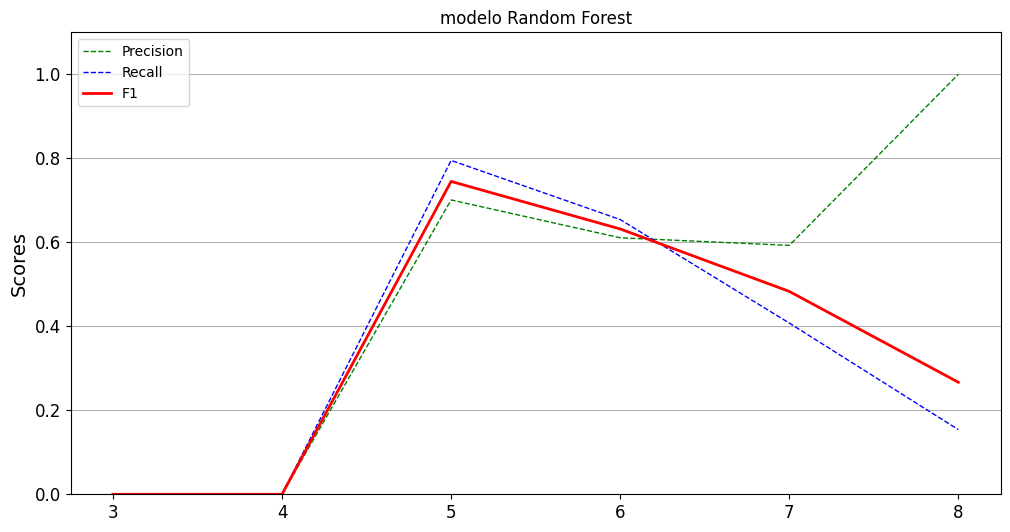

In [ ]:
from sklearn.metrics import precision_score;
from sklearn.metrics import recall_score;
from sklearn.metrics import f1_score;

precision = precision_score(y_train, y_forest_pred, average=None)
recall = recall_score(y_train, y_forest_pred, average=None)
f1 = f1_score(y_train, y_forest_pred, average=None)


print('Puntuaciones:\n')
print("Precisión:","\t", np.round(precision,2), np.mean(precision));
print("Recall:","\t", np.round(recall, 2), np.mean(recall));
print("F1:","\t\t", np.round(f1, 2), np.mean(f1));
print('\n')


plt.figure(figsize=(12, 6))
ax = sns.lineplot(x=forest_clf.classes_, y=precision, linewidth=1.0, color="green", linestyle="--", label=f'Precision');
ax = sns.lineplot(x=forest_clf.classes_, y=recall, linewidth=1.0, color="blue",  linestyle="--", label='Recall');
ax = sns.lineplot(x=forest_clf.classes_, y=f1, linewidth=2.0, color="red", label='F1');
plt.title("modelo Random Forest");
plt.ylabel('Scores')
plt.grid(axis='y')
plt.legend()
ax.set_ylim(0,1.1);
plt.show();

Aplicando un redondeo a los scores, con el modelo RandomForest la precisión es de un 48%, el recall tiene un 33% y el F1 un 35%. En comparación con el mejor modelo hasta ahora que fue Logistic Regressor (precisión=34%, recall=28% y F1 casi un 30%), el modelo RandomForest tiene mejores scores, especialmente la precisión es mejor pues está bastante cerca del 50% de precisión.

#### Modelo XGBoost

Los modelos anteriores mantienen las etiquetas de clase originales independientemente de si comienzan en 0 o no, pero en el caso de XGBoost da el siguiente **error** al realizar el entrenamiento con ```fit```: 
 
```ValueError: Invalid classes inferred from unique values of y.  Expected: [0 1 2 3 4 5], got [3 4 5 6 7 8]. ```

El clasificador espera etiquetas como [0, 1, 2, 3, 4], pero en los datos de prueba se encuentra [3, 4, 5, 6, 7, 8]. 

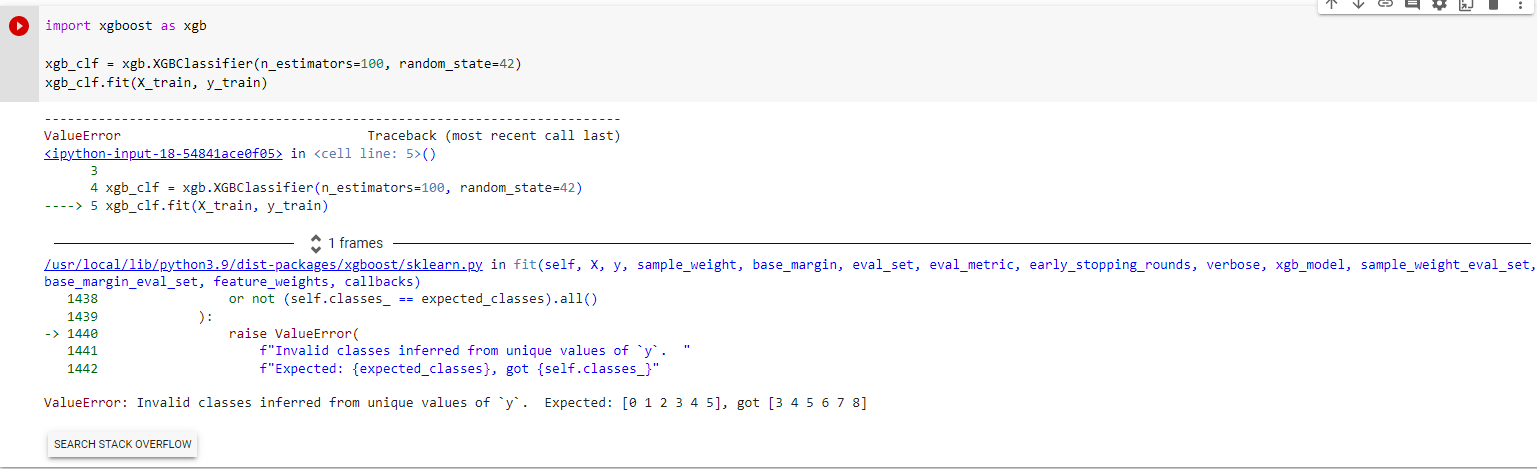

In [ ]:
y_train.value_counts()

5    551
6    506
7    157
4     44
8     13
3      9
Name: quality, dtype: int64

In [ ]:
import xgboost as xgb
xgb.__version__

'1.7.5'

Por defecto XGBoost asume que las etiquetas de clase son enteros consecutivos que comienzan por 0, por eso salta el error. [Ver en stackoverflow](https://stackoverflow.com/questions/71996617/invalid-classes-inferred-from-unique-values-of-y-expected-0-1-2-3-4-5-got)

Lo ideal sería evitar cambiar las etiquetas de clase siempre que sea posible y poder mantenerlas(3,4,5,6,7 y 8), porque puede introducir cierto sesgo en los resultados. En versiones anteriores de XGBoost era posible evitar este problema con el parámetro `label`. 

Pero en el caso de este dataset de vinos el impacto de cambiar las etiquetas es probablemente bajo, ya que las etiquetas son simplemente una puntuación de calidad del vino y no hay una relación numérica real entre ellas. Además, es recomendable usar siempre la última versión estable.

De esta forma, para evitar posibles problemas con el entrenamiento del modelo y asegurarse de que los resultados sean coherentes y comparables con el resto de modelos probados, se ha decidido cambiar las etiquetas a [0, 1, 2, 3, 4, 5]. 

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [ ]:
#import xgboost as xgb

xgb_clf = xgb.XGBClassifier(n_estimators=100, random_state=42)
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

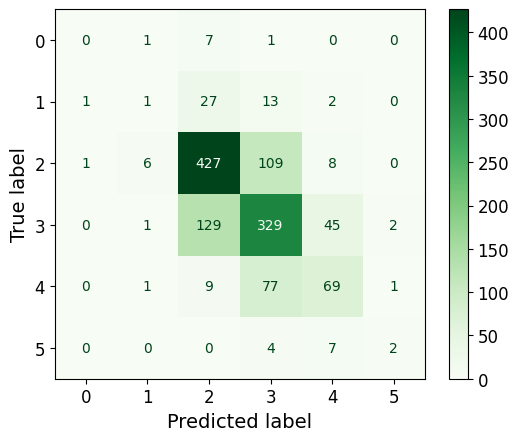

In [ ]:
# realiza la predicción por validación cruzada con 3 particiones cv=3
y_xgb_pred =  cross_val_predict(xgb_clf,X_train, y_train, cv=3)


# se muestra la MATRIZ DE CONFUSIÓN
matrix = confusion_matrix(y_train, y_xgb_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=xgb_clf.classes_)
disp.plot(cmap="Greens");

SCORES XGBoost:

Puntuaciones:

Precisión: 	 [0.   0.1  0.71 0.62 0.53 0.4 ] 0.3928055171957145
Recall: 	 [0.   0.02 0.77 0.65 0.44 0.15] 0.3402026881401634
F1: 		 [0.   0.04 0.74 0.63 0.48 0.22] 0.35238931213019664


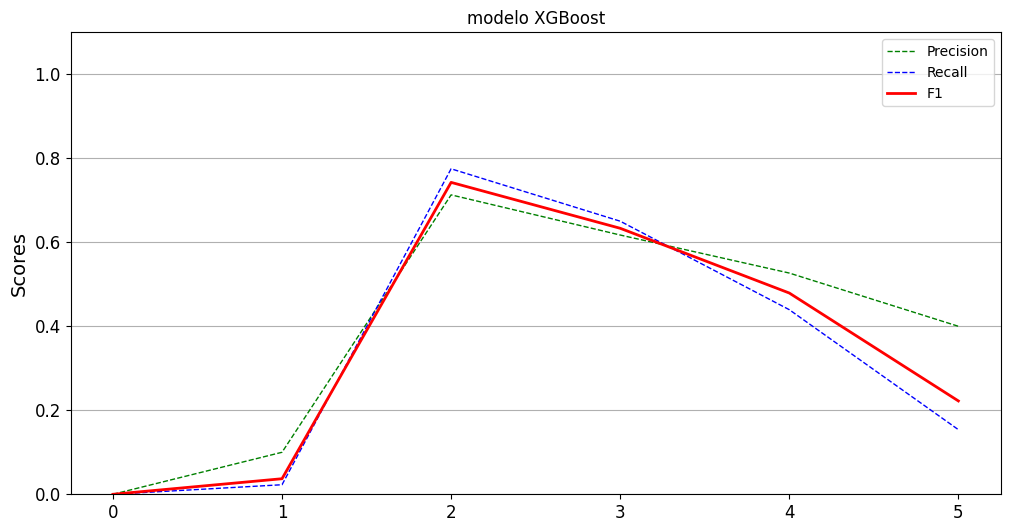

In [ ]:
from sklearn.metrics import precision_score;
from sklearn.metrics import recall_score;
from sklearn.metrics import f1_score;

precision = precision_score(y_train, y_xgb_pred, average=None)
recall = recall_score(y_train, y_xgb_pred, average=None)
f1 = f1_score(y_train, y_xgb_pred, average=None)

print("Puntuaciones:\n")
print("Precisión:","\t", np.round(precision,2), np.mean(precision));
print("Recall:","\t",    np.round(recall,   2), np.mean(recall));
print("F1:","\t\t",      np.round(f1,       2), np.mean(f1));


plt.figure(figsize=(12, 6))
ax = sns.lineplot(x=xgb_clf.classes_, y=precision, linewidth=1.0, color="green", linestyle="--", label=f'Precision');
ax = sns.lineplot(x=xgb_clf.classes_, y=recall, linewidth=1.0, color="blue",  linestyle="--", label='Recall');
ax = sns.lineplot(x=xgb_clf.classes_, y=f1, linewidth=2.0, color="red", label='F1');
plt.title("modelo XGBoost");
plt.ylabel('Scores')
plt.grid(axis = 'y')
plt.legend()
ax.set_ylim(0,1.1);
plt.show();

Aplicando un redondeo a los scores, con el modelo XGBoost la precisión es de un 39%, el recall es de un 34% y el F1 un 35%. Estos scores son un poco mejores que los del modelo Logistic Regressor (precisión=34%, recall=28% y F1 casi un 30%), pero no superan al modelo RandomForest(precisión=48%, recall=33%, F1=35%).

## **TEST del clasificador multiclase**


Finalmente se realiza el test con el modelo que ha dado un **mejor resultado**. Una vez vistos los resultados de los scores de todos los modelos, el mejor modelo para la clasificación multiclase ha sido **Random Forest Classifier**. 

Obtuvo la mayor precisión(0.48) y el mayor F1(0.35), y aunque su recall(0.33) no es el más alto(ver recall del modelo XGBoost=0.3402), sigue siendo competitivo en comparación con los otros modelos.

Definimos el conjunto de testeo ```X_test``` eliminando la columna objetivo *quality* del dataset.

In [ ]:
y_test = X_test["quality"].copy()
X_test = X_test.drop("quality", axis=1)

Hacemos los mismos pasos pero ahora con el **test set(```X_test```, ```y_test```)**: se calcula la Matriz de confusión, luego los Scores.

Se inicializa el clasificador

In [ ]:
from sklearn.ensemble import RandomForestClassifier;

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf.fit(X_test, y_test)

RandomForestClassifier(random_state=42)

Matriz de confusión:

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


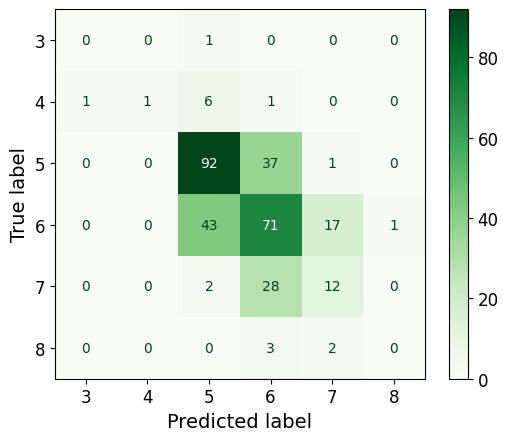

In [ ]:
# Hago la predicción cruzada con 3 particiones cv=3
y_forest_pred_test = cross_val_predict(forest_clf, X_test, y_test, cv=3)

# Muestro la MATRIZ DE CONFUSIÓN
matrix = confusion_matrix(y_test, y_forest_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=forest_clf.classes_)
disp.plot(cmap="Greens");

SCORES RandomForestClassifier:

Puntuaciones:

Precisión: 	 [0.   1.   0.64 0.51 0.38 0.  ] 0.42017195767195764
Recall: 	 [0.   0.11 0.71 0.54 0.29 0.  ] 0.2737327487327487
F1: 		 [0.   0.2  0.67 0.52 0.32 0.  ] 0.28631933242817736




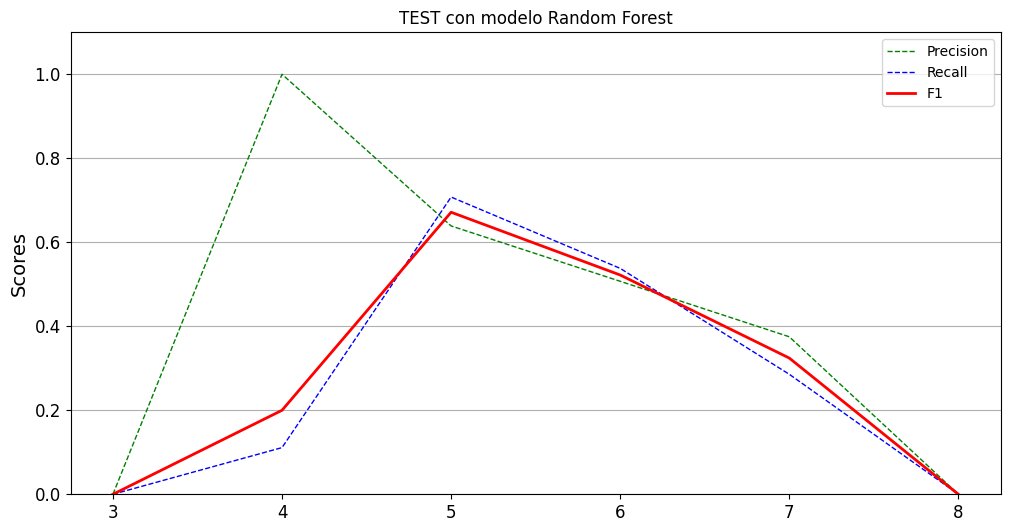

In [ ]:
from sklearn.metrics import precision_score;
from sklearn.metrics import recall_score;
from sklearn.metrics import f1_score;

precision = precision_score(y_test, y_forest_pred_test, average=None)
recall = recall_score(y_test, y_forest_pred_test, average=None)
f1 = f1_score(y_test, y_forest_pred_test, average=None)


print('Puntuaciones:\n')
print("Precisión:","\t", np.round(precision,2), np.mean(precision));
print("Recall:","\t", np.round(recall, 2), np.mean(recall));
print("F1:","\t\t", np.round(f1, 2), np.mean(f1));
print('\n')


plt.figure(figsize=(12, 6))
ax = sns.lineplot(x=forest_clf.classes_, y=precision, linewidth=1.0, color="green", linestyle="--", label=f'Precision');
ax = sns.lineplot(x=forest_clf.classes_, y=recall, linewidth=1.0, color="blue",  linestyle="--", label='Recall');
ax = sns.lineplot(x=forest_clf.classes_, y=f1, linewidth=2.0, color="red", label='F1');
plt.title("TEST con modelo Random Forest");
plt.ylabel('Scores')
plt.grid(axis='y')
plt.legend()
ax.set_ylim(0,1.1);
plt.show();

Con el **test set** los scores obtenidos son:
- precision = 0.42 
- recall = 0.27
- F1 = 0.28

Analizando los picos de la gráfica, la precisión para los vinos con una calidad del 4 es del 100%, y el recall y F1 para los vinos con una calidad del 5 es de un 71% y 67% respectivamente.

Con el **train set** los scores obtenidos fueron:
- precisión = 0.48
- recall = 0.33
- F1 = 0.35

El modelo Random Forest Classifier logró una precisión del 42%, lo que significa que de todas las predicciones realizadas para la calidad del vino, solo el 42% son verdaderamente positivas(TP). El recall del modelo fue del 27%, lo que indica que de todas las muestras de calidad de vino verdaderamente positivas(TP), el modelo solo detectó el 27%. Y la medida de F1 del modelo fue del 28%, que es la media armónica entre precisión y recall.

Viendo los resultados de las métricas, el modelo tiene un desempeño bastante bajo tanto en el conjunto de entrenamiento como en el conjunto de test. La precisión y el recall son bastante bajos en ambos casos, lo que sugiere que el modelo está teniendo **dificultades para clasificar correctamente** las muestras en las diferentes clases. En otras palabras, el modelo está memorizando los datos de entrenamiento en vez de generalizar y aprender patrones que se pueden aplicar a datos nuevos. Para **mejorar el rendimiento del modelo Random Forest** se decide **ajustar los hiperparámetros del modelo para mejorar el rendimiento del modelo**.

## **Ajustando los hiperparámetros del modelo Random Forest Classifier**

El ajuste de los hiperparámetros se realiza en el conjunto de entrenamiento. Una vez encontrada la combinación de parámetros que ofrece el mejor rendimiento en el conjunto de entrenamiento, se puede probar el modelo ajustado en el conjunto de prueba. De este modo se va a conseguir mejorar el rendimiento del modelo.

Es importante tener en cuenta que se deben realizar pruebas de validación cruzada y ajustar los parámetros utilizando técnicas como Grid Search en el conjunto de entrenamiento para evitar el sobreajuste del modelo a este conjunto y asegurar su generalización a nuevos datos.

In [ ]:
from sklearn.ensemble import RandomForestClassifier;

#forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
#forest_clf.fit(X_train, y_train)

Se utiliza GridSearchCV para buscar los mejores hiperparámetros. 

A mayor número de estimadores, también aumentará el tiempo de entrenamiento. Por otro lado, este aumento generalmente mejora su desempeño y disminuye la varianza. 


In [ ]:
from sklearn.model_selection import GridSearchCV;


# la lista de hiperparámetros y sus posibles valores
param_grid = {
    'n_estimators': [100, 150, 200], # número de árboles en el bosque
    'max_depth': [5, 10, None],      # profundidad máxima de cada árbol
    'min_samples_split': [2, 5, 10], # nº mínimo de muestras necesarias para dividir un nodo interno
    'min_samples_leaf': [1, 2, 4],   # nº mínimo de muestras necesarias en una hoja deñl arbol
    'max_features': ['sqrt', 'log2', None]
}

# instancia del modelo
forest_clf = RandomForestClassifier(random_state=42)

# GridSearchCV para buscar los mejores hiperparámetros
# modelo 
# parametros
# num particiones de la cross val
# scoring
# número de trabajos en paralelo que se ejecutan durante el ajuste del modelo. 
# njobs=-1 ---> el modelo intentará utilizar todos los núcleos disponibles en el procesador para ajustar el modelo 
grid_search = GridSearchCV(forest_clf, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)


print('Mejores hiperparámetros:', grid_search.best_params_)



Mejores hiperparámetros: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


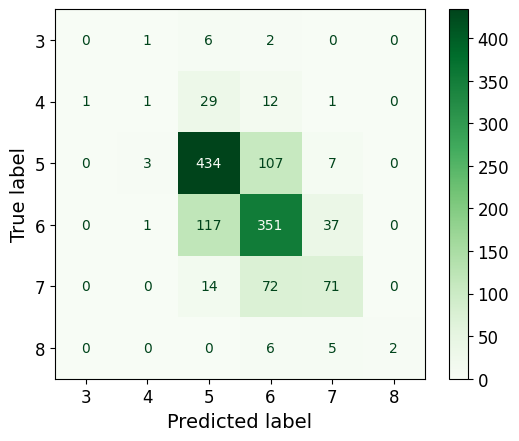

In [ ]:
# 4. Entrenar el modelo con los mejores hiperparámetros y hacer la predicción con cross_val_predict
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


best_forest_clf = grid_search.best_estimator_
y_forest_pred_cv = cross_val_predict(best_forest_clf, X_train, y_train, cv=3)

# Mostrar la MATRIZ DE CONFUSIÓN
matrix = confusion_matrix(y_train, y_forest_pred_cv)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=best_forest_clf.classes_)
disp.plot(cmap="Greens");

In [ ]:
best_forest_clf.classes_

array([3, 4, 5, 6, 7, 8])

SCORES:

Puntuaciones:

Precisión: 	 [0.   0.   0.7  0.61 0.59 1.  ] 0.48401561660061043
Recall: 	 [0.   0.   0.79 0.65 0.41 0.15] 0.33509299898084216
F1: 		 [0.   0.   0.74 0.63 0.48 0.27] 0.3543771471813076




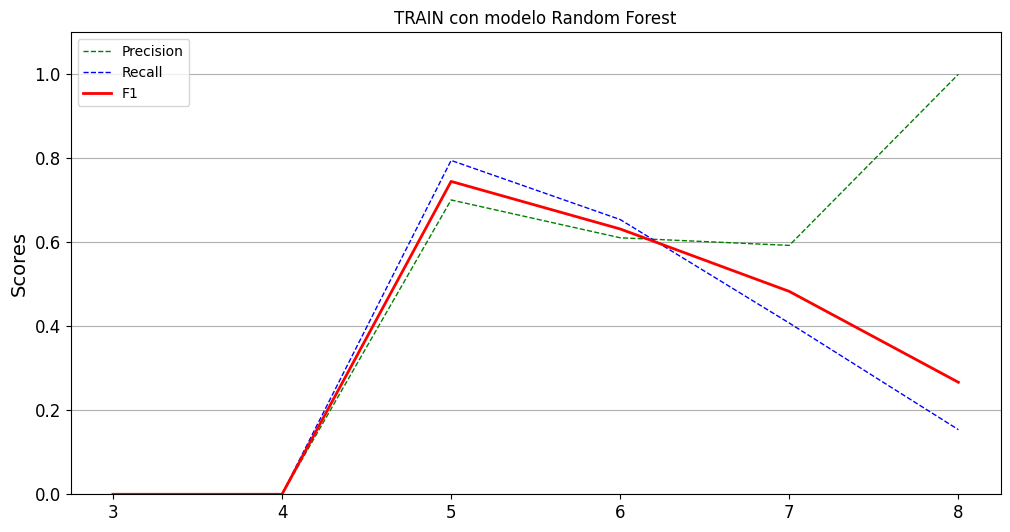

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Predicción con validación cruzada con los nuevos hiperparámetros
y_forest_pred_cv = cross_val_predict(forest_clf, X_train, y_train, cv=3, n_jobs=-1)

# Cálculo de los scores
precision = precision_score(y_train, y_forest_pred_cv, average=None)
recall = recall_score(y_train, y_forest_pred_cv, average=None)
f1 = f1_score(y_train, y_forest_pred_cv, average=None)

# Impresión de los scores
print('Puntuaciones de los scores:\n')
print("Precisión:","\t", np.round(precision,2), np.mean(precision));
print("Recall:","\t", np.round(recall, 2), np.mean(recall));
print("F1:","\t\t", np.round(f1, 2), np.mean(f1));
print('\n')

# gráfica
plt.figure(figsize=(12, 6))
ax = sns.lineplot(x=best_forest_clf.classes_, y=precision, linewidth=1.0, color="green", linestyle="--", label=f'Precision');
ax = sns.lineplot(x=best_forest_clf.classes_, y=recall, linewidth=1.0, color="blue",  linestyle="--", label='Recall');
ax = sns.lineplot(x=best_forest_clf.classes_, y=f1, linewidth=2.0, color="red", label='F1');
plt.title("TRAIN con modelo Random Forest");
plt.ylabel('Scores')
plt.grid(axis='y')
plt.legend()
ax.set_ylim(0,1.1);
plt.show();


## **CONCLUSIÓN**

Después de ajustar los hiperparámetros del modelo Random Forest Classifier utilizando la técnica de GridSearchCV, los resultados no mejoraron significativamente. Con esto se concluye que no siempre es posible mejorar las métricas simplemente ajustando los hiperparámetros, pues también es importante considerar el equilibrio entre la cantidad y la calidad de los datos.

Probablemente una mejor selección de características o una mayor cantidad de datos de entrenamiento también puedan mejorar el rendimiento del modelo.

Para aumentar el tamaño del conjunto de datos, se pueden explorar diferentes opciones:
- **Recopilación de datos adicionales** ➜ el aumento de datos ayudaría a que el modelo generalizase mejor. Al aumentar la cantidad de datos, el modelo tiene más ejemplos para aprender y, por lo tanto, es menos probable que se sobreajuste a los datos de entrenamiento. Además, el aumento de datos puede ayudar a equilibrar las clases desequilibradas y mejorar el rendimiento del modelo en datos de prueba.
- Reagrupación de la **columna *quality*** en **3 grupos**, en lugar de 6. ➜ En este dataset de vinos, *quality* es una columna bastante desbalanceada. Crear 3 grupos de calidad alta, media y baja puede ayudar a equilibrar los datos y hacer que el modelo tenga más capacidad para encontrar patrones útiles en los datos.

- Uso de técnicas de muestreo como el **submuestreo aleatorio**. ➜ Eliminando aleatoriamente algunas muestras de la clase mayoritaria para igualar el número de muestras en ambas clases. Este enfoque puede funcionar bien cuando la clase mayoritaria tiene muchas más muestras que la clase minoritaria. En este problema de clasificación se podría aplicar ya que, como se muestra en el apartado anterior de exploración de datos, la clase de calidad 5 tiene muchas más muestras que las clases minoritarias de calidad 3 o 4.
